In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression


data = pd.read_excel("./Data-FilthyRobot.xlsx")
data

,game,civilization,score,turns,won,mountain,river,ocean,hill
0,2,shoshone,1573,186,1,0,1,0,1
1,3,aztec,1172,159,1,1,1,0,1
2,11,shoshone,1153,198,1,0,0,1,1
3,14,arabia,1729,186,1,0,0,0,1
4,28,shoshone,1385,172,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
67,404,greece,1424,176,0,0,1,0,1
68,425,greece,1185,172,0,1,0,0,1
69,427,mayan,422,99,0,0,0,1,1
70,458,spain,2006,161,1,0,0,1,1


In [2]:
print(data.shape)
print(list(data.columns))

(72, 9)
['game', 'civilization', 'score', 'turns', 'won', 'mountain', 'river', 'ocean', 'hill']


In [3]:
# fix the data types of columns
print(data.dtypes)
data['civilization'] = data['civilization'].astype('category')
data['score'] = data['score'].astype('int')
data['turns'] = data['turns'].astype('int')
data['won'] = data['won'].astype('bool')
data['mountain'] = data['mountain'].astype('bool')
data['river'] = data['river'].astype('bool')
data['ocean'] = data['ocean'].astype('bool')
data['hill'] = data['hill'].astype('bool')
print(data.dtypes)

game             int64
civilization    object
score            int64
turns            int64
won              int64
mountain         int64
river            int64
ocean            int64
hill             int64
dtype: object
game               int64
civilization    category
score              int32
turns              int32
won                 bool
mountain            bool
river               bool
ocean               bool
hill                bool
dtype: object


In [4]:
print(data['civilization'].value_counts())

greece      15
russia      13
aztec       11
spain        8
arabia       7
shoshone     7
china        5
mayan        4
huns         2
Name: civilization, dtype: int64


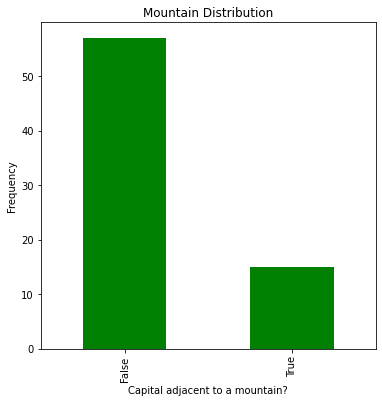

In [5]:

mountain_bar = data['mountain'].value_counts().plot(kind='bar', xlabel="Capital adjacent to a mountain?", ylabel="Frequency", title = "Mountain Distribution", figsize = (6,6), color='green')
fig = mountain_bar.get_figure()
# fig.savefig("../Media/Graphs/mountain_bar")

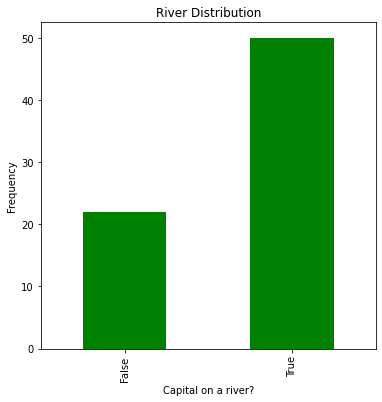

In [6]:
# ascending=True used to have x-axis always be False -> True
river_bar = data['river'].value_counts(ascending=True).plot(kind='bar', xlabel="Capital on a river?", ylabel="Frequency", title = "River Distribution", figsize = (6,6), color='green')
fig = river_bar.get_figure()
# fig.savefig("../Media/Graphs/river_bar")

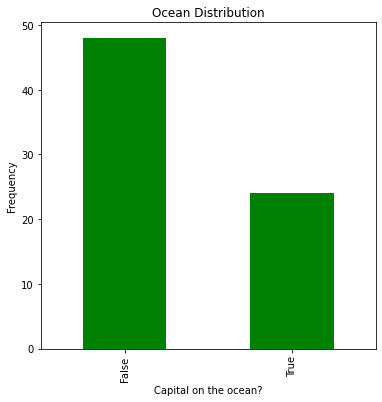

In [7]:
ocean_bar = data['ocean'].value_counts().plot(kind='bar', xlabel="Capital on the ocean?", ylabel="Frequency", title = "Ocean Distribution", figsize = (6,6), color='green')
fig = ocean_bar.get_figure()
# fig.savefig("../Media/Graphs/ocean_bar")

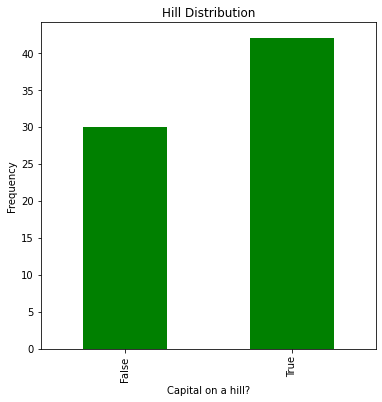

In [8]:
# ascending=True used to have x-axis always be False -> True
hill_bar = data['hill'].value_counts(ascending=True).plot(kind='bar', xlabel="Capital on a hill?", ylabel="Frequency", title = "Hill Distribution", figsize = (6,6), color='green')
fig = hill_bar.get_figure()
# fig.savefig("../Media/Graphs/hill_bar")

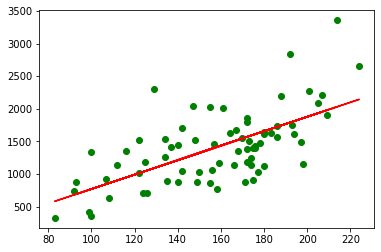

In [9]:
X = data.turns.values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.score.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color='green')
plt.plot(X, Y_pred, color='red')
plt.show()

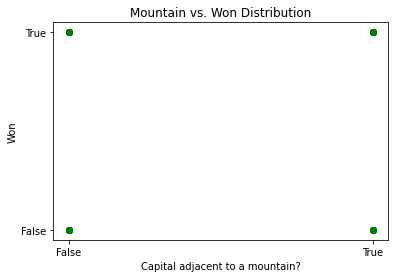

In [10]:
X = data.mountain.values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.won.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color='green')
# plt.plot(X, Y_pred, color='red')
plt.xlabel("Capital adjacent to a mountain?")
plt.ylabel("Won")
plt.title("Mountain vs. Won Distribution")
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
# plt.savefig("../Media/Graphs/mountain_vs_won")
plt.show()


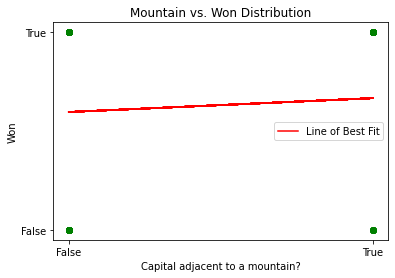

In [11]:
X = data.mountain.values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.won.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y, color='green')
plt.plot(X, Y_pred, color='red', label="Line of Best Fit")
plt.xlabel("Capital adjacent to a mountain?")
plt.ylabel("Won")
plt.legend()
plt.title("Mountain vs. Won Distribution")
plt.xticks([0, 1], ['False', 'True'])
plt.yticks([0, 1], ['False', 'True'])
# plt.savefig("../Media/Graphs/mountain_vs_won_linear_regression")
plt.show()

In [12]:
# win rate %
print(data['won'].mean())

0.6111111111111112


In [13]:
# pd.crosstab(data.civilization, data.won).plot(kind='bar')
# plt.show()

In [14]:
# exploring the groupby method
# by_civilization = data.groupby('civilization')
# for civ in by_civilization:
#     print(civ)
print(data.groupby('civilization')['won'].mean())

civilization
arabia      0.714286
aztec       0.818182
china       0.800000
greece      0.533333
huns        0.500000
mayan       0.500000
russia      0.538462
shoshone    0.714286
spain       0.375000
Name: won, dtype: float64


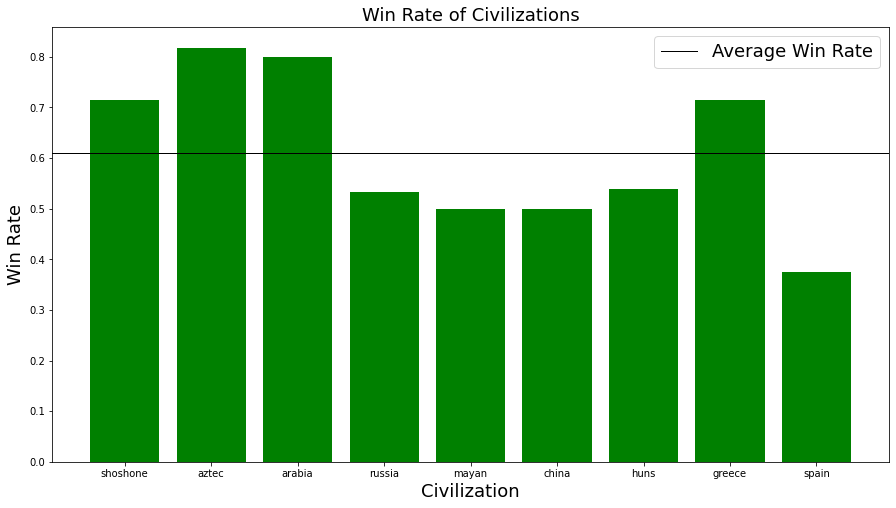

In [15]:
plt.figure(figsize=(15, 8))
plt.bar(data.civilization.unique(), data.groupby('civilization')['won'].mean(), color='green')
plt.axhline(y=.61, linewidth=1, color='black', label='Average Win Rate')
plt.legend(fontsize = 18)
plt.title('Win Rate of Civilizations', fontsize = 18)
plt.xlabel('Civilization', fontsize = 18)
plt.ylabel('Win Rate', fontsize = 18)
# plt.savefig("../Media/Graphs/civ_win_rates")
plt.show()

In [16]:
no_spain = data.loc[data['civilization'] != 'spain']
print(no_spain)
print(no_spain['won'].mean())

spain = data.loc[data['civilization'] == 'spain']
print(spain)
print(spain['won'].mean())

stats.ttest_1samp(spain['won'], no_spain['won'].mean())

    game civilization  score  turns    won  mountain  river  ocean  hill
0      2     shoshone   1573    186   True     False   True  False  True
1      3        aztec   1172    159   True      True   True  False  True
2     11     shoshone   1153    198   True     False  False   True  True
3     14       arabia   1729    186   True     False  False  False  True
4     28     shoshone   1385    172   True     False  False   True  True
..   ...          ...    ...    ...    ...       ...    ...    ...   ...
65   395       greece    925    107  False     False   True  False  True
67   404       greece   1424    176  False     False   True  False  True
68   425       greece   1185    172  False      True  False  False  True
69   427        mayan    422     99  False     False  False   True  True
71   465       russia   1407    137  False     False   True  False  True

[64 rows x 9 columns]
0.640625
    game civilization  score  turns    won  mountain  river  ocean   hill
30   154        sp

Ttest_1sampResult(statistic=-1.451651358510943, pvalue=0.18989656504038468)

<AxesSubplot:xlabel='hill'>

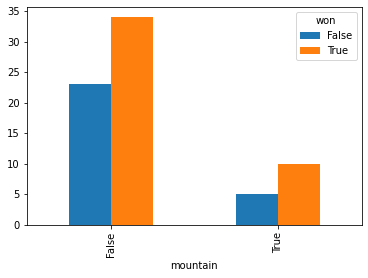

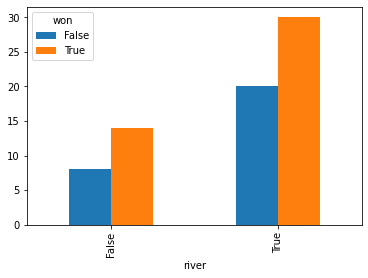

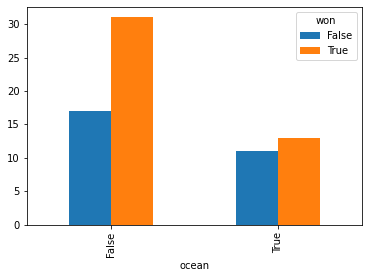

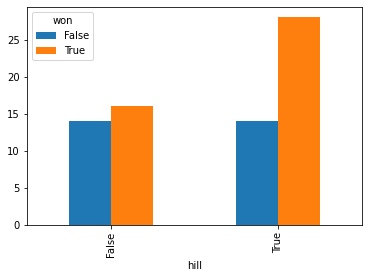

In [17]:
pd.crosstab(data.mountain, data.won).plot(kind='bar')
pd.crosstab(data.river, data.won).plot(kind='bar')
pd.crosstab(data.ocean, data.won).plot(kind='bar')
pd.crosstab(data.hill, data.won).plot(kind='bar')

In [18]:
import statsmodels.api as sm
X = data[['mountain', 'hill', 'ocean', 'river']]
y = data['won']

# log_reg = sm.Logit(y, sm.add_constant(X)).fit()
# print(log_reg.summary())
# print(log_reg.params)
# np.exp(log_reg.params)

In [19]:
log_reg = sm.Logit(data['won'], data['mountain']).fit()
print(log_reg.summary())
print(np.exp(log_reg.params))

Optimization terminated successfully.
         Current function value: 0.681349
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                   72
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            0
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                -0.01960
Time:                        20:50:28   Log-Likelihood:                -49.057
converged:                       True   LL-Null:                       -48.114
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mountain       0.6931      0.548      1.266      0.206      -0.380       1.767
mountain    2.0
dtype: float6

In [20]:
log_reg_hill = sm.Logit(data['won'], data['hill']).fit()
print(log_reg_hill.summary())
print(np.exp(log_reg_hill.params))

Optimization terminated successfully.
         Current function value: 0.660111
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                   72
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            0
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                 0.01218
Time:                        20:50:28   Log-Likelihood:                -47.528
converged:                       True   LL-Null:                       -48.114
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hill           0.6931      0.327      2.118      0.034       0.052       1.335
hill    2.0
dtype: float64


In [21]:
log_reg_river = sm.Logit(data['won'], data['river']).fit()
print(log_reg_river.summary())
print(np.exp(log_reg_river.params))

Optimization terminated successfully.
         Current function value: 0.679164
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                   72
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            0
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                -0.01633
Time:                        20:50:28   Log-Likelihood:                -48.900
converged:                       True   LL-Null:                       -48.114
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
river          0.4055      0.289      1.405      0.160      -0.160       0.971
river    1.5
dtype: float64


In [22]:
log_reg_ocean = sm.Logit(data['won'], data['ocean']).fit()
print(log_reg_ocean.summary())
print(np.exp(log_reg_ocean.params))

Optimization terminated successfully.
         Current function value: 0.691988
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                   72
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            0
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                -0.03553
Time:                        20:50:28   Log-Likelihood:                -49.823
converged:                       True   LL-Null:                       -48.114
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ocean          0.1671      0.410      0.408      0.683      -0.636       0.970
ocean    1.181818
dtype: floa

Optimization terminated successfully.
         Current function value: 0.611936
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    won   No. Observations:                   72
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            0
Date:                Tue, 04 Jan 2022   Pseudo R-squ.:                 0.08427
Time:                        20:50:28   Log-Likelihood:                -44.059
converged:                       True   LL-Null:                       -48.114
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
score          0.0006      0.000      3.198      0.001       0.000       0.001
score    1.000571
dtype: floa

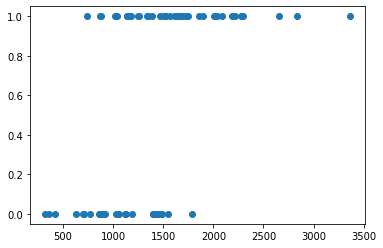

In [23]:
log_reg_turns = sm.Logit(data['won'], data['score']).fit()
print(log_reg_turns.summary())
print(np.exp(log_reg_turns.params))
plt.scatter(data['score'], data['won'])

plt.show()

C:\Users\Cedric\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


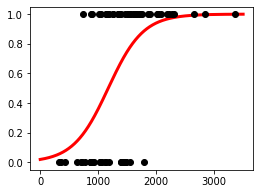

In [24]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
X = data['score'].values.reshape(-1,1)
Y = data['won'].values.reshape(-1,1)
clf = LogisticRegression()
clf.fit(X, Y)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X, Y, color='black', zorder=20)
X_test = np.linspace(0, 3500, 1000)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)
plt.show()

C:\Users\Cedric\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0.5, 1.0, 'Score vs. Mountain Distribution')

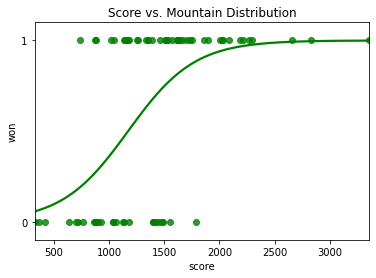

In [25]:
X = data['score'].values.reshape(-1,1)
Y = data['won'].values.reshape(-1,1)

LogR = LogisticRegression()
LogR.fit(X, Y)
# plt.scatter(X,Y)
sns.regplot(x='score', y='won', data=data, logistic=True, color='green', ci=None)
plt.ylim(-.1,1.1)
plt.yticks([0,1])
plt.title("Score vs. Mountain Distribution")
# plt.savefig("../Media/Graphs/score_vs_mountain_logistic")

Text(0.5, 1.0, 'Score vs. Mountain Distribution')

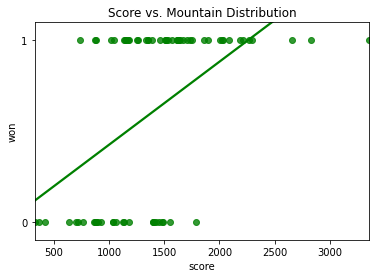

In [26]:
sns.regplot(x='score', y='won', data=data, color='green', ci=None)
plt.ylim(-.1,1.1)
plt.yticks([0,1])
plt.title("Score vs. Mountain Distribution")
# plt.savefig("../Media/Graphs/score_vs_mountain_linear")

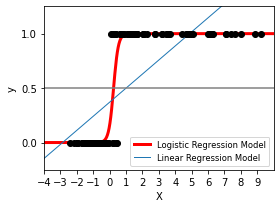

In [27]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()
